# PIK3CA: Effects of Hotspot Mutation on PTEN

#### PTEN is a negative regulator in the PI3K/AKT/mTOR signaling pathway. Previous studies showed that PTEN expression decreases when PIK3CA is mutated: https://www.sciencedirect.com/science/article/pii/S1535610809001779

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'PTEN'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

19


## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.8711143370261585, pvalue=0.0676976304099718)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.4559706938463686, pvalue=0.01581066819387846)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-1.2815483105994718, pvalue=0.20302505456125847)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.587654791753785, pvalue=0.011772080612918)


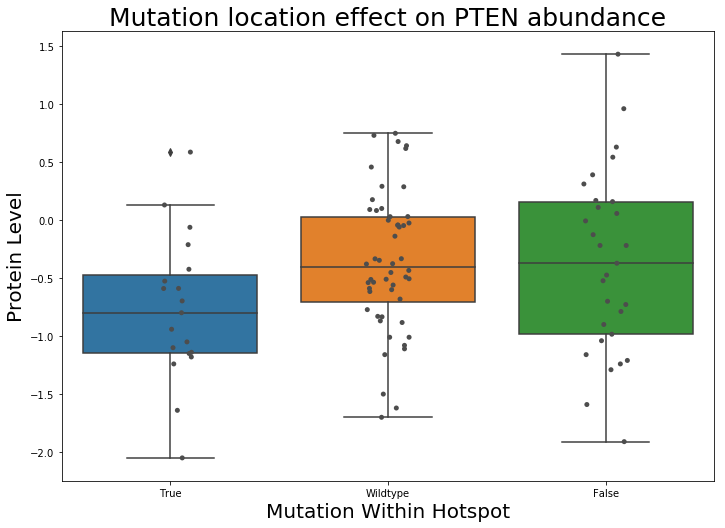

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PTEN abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      PTEN-S467  PTEN-S475  PTEN-S478  PTEN-S537  PTEN-S543  PTEN-S558  \
S001    0.19500    0.11750     0.1750        NaN        NaN   -0.42800   
S002   -0.06110   -0.07510        NaN        NaN    -0.2560   -0.09960   
S003    0.41600        NaN        NaN        NaN        NaN   -0.86550   
S004   -0.02000        NaN        NaN        NaN        NaN   -0.57500   
S005    1.77000        NaN        NaN        NaN        NaN    1.02000   
S006    0.02580        NaN        NaN    -0.1280    -0.0901   -0.27250   
S007    0.28348   -0.00604        NaN        NaN    -0.4660   -0.05060   
S008   -0.83300        NaN        NaN        NaN    -0.4810   -0.63900   
S009    0.42200        NaN        NaN        NaN        NaN    0.03880   
S010    0.74100        NaN        NaN     0.0988    -0.2056   -0.32200   
S011   -0.17100        NaN        NaN        NaN        NaN    0.29600   
S012    0.25600        NaN        NaN        NaN     0.0544   -0.30550   
S013   -0.23100        NaN        NaN 

## Hotspot mutation vs non-hotspot mutation

In [13]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for PTEN-S467 Ttest_indResult(statistic=-0.0889605186231972, pvalue=0.9294994804576602)
Test for PTEN-S475 Ttest_indResult(statistic=0.3149163751092488, pvalue=0.7634892770327384)
Test for PTEN-S478 Ttest_indResult(statistic=-0.7832516521827481, pvalue=0.4689366495118761)
Test for PTEN-S537 Ttest_indResult(statistic=nan, pvalue=nan)
Test for PTEN-S543 Ttest_indResult(statistic=1.2344456125158239, pvalue=0.2482959982789169)
Test for PTEN-S558 Ttest_indResult(statistic=-1.7014992185996294, pvalue=0.0966113435394307)
Test for PTEN-T539 Ttest_indResult(statistic=1.8598012996739428, pvalue=0.09996111141767287)
Test for PTEN-T555 Ttest_indResult(statistic=nan, pvalue=nan)
Test for PTEN-T556 Ttest_indResult(statistic=-1.5311675980154633, pvalue=0.13446917451488788)


/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Hotspot mutation vs other mutations and wildtype

In [14]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for PTEN-S467 Ttest_indResult(statistic=0.5888042477463895, pvalue=0.5573473385330219)
Test for PTEN-S475 Ttest_indResult(statistic=-0.5293115168148852, pvalue=0.6043352102652493)
Test for PTEN-S478 Ttest_indResult(statistic=-1.2317696679199184, pvalue=0.24621432586434788)
Test for PTEN-S537 Ttest_indResult(statistic=-0.6572698540049134, pvalue=0.5400540531400972)
Test for PTEN-S543 Ttest_indResult(statistic=0.37288940249813446, pvalue=0.7129680011221748)
Test for PTEN-S558 Ttest_indResult(statistic=-1.9700541961625009, pvalue=0.05229241583341533)
Test for PTEN-T539 Ttest_indResult(statistic=-0.6922709119979857, pvalue=0.4981149038190714)
Test for PTEN-T555 Ttest_indResult(statistic=nan, pvalue=nan)
Test for PTEN-T556 Ttest_indResult(statistic=-1.7152295917488578, pvalue=0.09048795079839768)


## All mutations vs wildtype

In [15]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for PTEN-S467 Ttest_indResult(statistic=1.318930403434209, pvalue=0.19026606659216647)
Test for PTEN-S475 Ttest_indResult(statistic=-1.5531671104832117, pvalue=0.14122448795457376)
Test for PTEN-S478 Ttest_indResult(statistic=-0.9147091949899863, pvalue=0.38187106027960205)
Test for PTEN-S537 Ttest_indResult(statistic=-1.0969092166106893, pvalue=0.3226776406521058)
Test for PTEN-S543 Ttest_indResult(statistic=-0.18090228410783082, pvalue=0.8581788029058597)
Test for PTEN-S558 Ttest_indResult(statistic=-1.1446996815301476, pvalue=0.2557468142640217)
Test for PTEN-T539 Ttest_indResult(statistic=-3.199351834137791, pvalue=0.0052548801938438975)
Test for PTEN-T555 Ttest_indResult(statistic=6.110913855530765, pvalue=0.0036300753692072177)
Test for PTEN-T556 Ttest_indResult(statistic=-0.8569307139618842, pvalue=0.39424983396314406)


## Hotspot mutation v wildtype

In [16]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for PTEN-S467 Ttest_indResult(statistic=0.9521898097016228, pvalue=0.3443244276059154)
Test for PTEN-S475 Ttest_indResult(statistic=-0.8910838683455253, pvalue=0.39381873128651856)
Test for PTEN-S478 Ttest_indResult(statistic=-1.4018630820448743, pvalue=0.21051175227314356)
Test for PTEN-S537 Ttest_indResult(statistic=-0.8630844614855835, pvalue=0.4367682363641005)
Test for PTEN-S543 Ttest_indResult(statistic=0.18037432601975764, pvalue=0.8592730255051992)
Test for PTEN-S558 Ttest_indResult(statistic=-1.8816598159521476, pvalue=0.06508350191384278)
Test for PTEN-T539 Ttest_indResult(statistic=-2.0930047458928556, pvalue=0.05652542154020103)
Test for PTEN-T555 Ttest_indResult(statistic=nan, pvalue=nan)
Test for PTEN-T556 Ttest_indResult(statistic=-1.611938147310737, pvalue=0.11302911258265788)


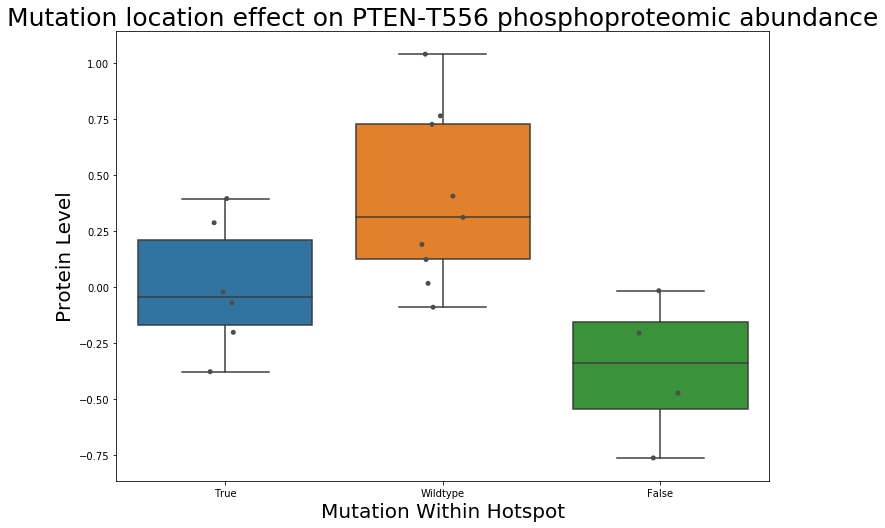

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = phos_mutations, x = 'Within_Hotspot', y = 'PTEN-T539', ax = ax)
boxplt = sns.stripplot(data = phos_mutations, x = 'Within_Hotspot', y = 'PTEN-T539', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PTEN-T539 phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

ValueError: Could not interpret input 'PTEN-S555'

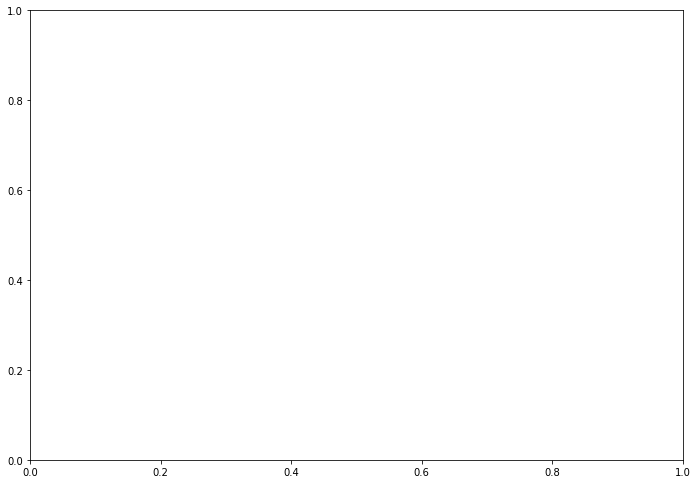

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = phos_mutations, x = 'Within_Hotspot', y = 'PTEN-S555', ax = ax)
boxplt = sns.stripplot(data = phos_mutations, x = 'Within_Hotspot', y = 'PTEN-S555', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PTEN-S558 phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()